In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim 
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt

device = 'cpu'
# 데이터셋 불러오기 

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

In [19]:
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE, self).__init__()
        
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc_average = nn.Linear(h_dim2, z_dim)
        self.fc_log_variance = nn.Linear(h_dim2, z_dim)

        self.fc3 = nn.Linear(z_dim, h_dim2)
        self.fc4 = nn.Linear(h_dim2, h_dim1)
        self.fc5 = nn.Linear(h_dim1, x_dim)
        
    def encoder(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc_average(x), self.fc_log_variance(x) 
    
    def reparameterization(self, average, log_variance):
        std = torch.exp(0.5 * log_variance)
        eps = torch.randn_like(std)
        return average + eps * std 

    def decoder(self, z):
        z = F.relu(self.fc3(z))
        z = F.relu(self.fc4(z))
        return torch.sigmoid(self.fc5(z)) 
    
    def forward(self, x):
        average, log_variance = self.encoder(x.view(-1, 784))
        z = self.reparameterization(average, log_variance)
        return self.decoder(z), average, log_variance

def loss_function(recon_x, x, average, log_variance):
    # Minimize 상태로 만들기 
    binary_cross_entropy = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KL_divergence = - 0.5 * torch.sum(1 + log_variance - average ** 2 - log_variance.exp())
    return binary_cross_entropy + KL_divergence

train_loss_list = []
test_loss_list = []

def train(epoch):
    model.train()
    train_loss = 0
    for data, _ in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        x_reconstruct, average, log_variance = model(data)
        loss = loss_function(x_reconstruct, data, average, log_variance)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print("{}'s avrage train loss : {}".format(epoch, train_loss / len(train_loader.dataset)))
    train_loss_list.append(train_loss / len(train_loader.dataset))

def test(epoch):
    model.eval()
    test_loss= 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            x_reconstruct, average, log_variance = model(data)
            test_loss += loss_function(x_reconstruct, data, average, log_variance).item()
    print("{}'s avrage test loss : {}".format(epoch, test_loss / len(test_loader.dataset)))
    test_loss_list.append(test_loss / len(test_loader.dataset))

1's avrage train loss : 176.04512413736978
1's avrage test loss : 148.33862314453125
2's avrage train loss : 145.71992563476562
2's avrage test loss : 143.1735275390625
3's avrage train loss : 142.12829907226563
3's avrage test loss : 141.53088603515624
4's avrage train loss : 140.14642194010418
4's avrage test loss : 139.4623673828125
5's avrage train loss : 138.80566404622397
5's avrage test loss : 138.71903994140624
6's avrage train loss : 137.7936864420573
6's avrage test loss : 138.15717646484376
7's avrage train loss : 136.93232174479166
7's avrage test loss : 136.86807529296874
8's avrage train loss : 136.1996525065104
8's avrage test loss : 136.39168994140624
9's avrage train loss : 135.61151263020832
9's avrage test loss : 135.83060478515625
10's avrage train loss : 135.05943095703125
10's avrage test loss : 135.55053388671874


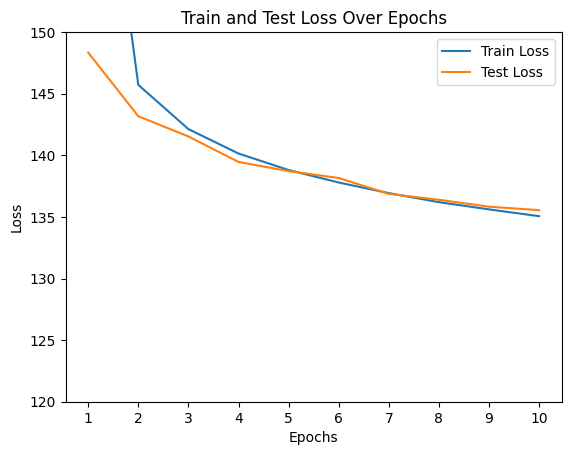

1's avrage train loss : 186.30080463867188
1's avrage test loss : 141.19390341796876
2's avrage train loss : 137.7275222330729
2's avrage test loss : 133.52267138671874
3's avrage train loss : 132.52678629557292
3's avrage test loss : 130.38973251953124
4's avrage train loss : 129.8354346191406
4's avrage test loss : 128.73884775390624
5's avrage train loss : 128.08842198893228
5's avrage test loss : 127.27463701171875
6's avrage train loss : 126.88947576497395
6's avrage test loss : 125.80331494140626
7's avrage train loss : 125.8724217936198
7's avrage test loss : 125.2063578125
8's avrage train loss : 125.11609420572917
8's avrage test loss : 124.5006060546875
9's avrage train loss : 124.38214488932292
9's avrage test loss : 123.871795703125
10's avrage train loss : 123.84578248697916
10's avrage test loss : 123.4276193359375


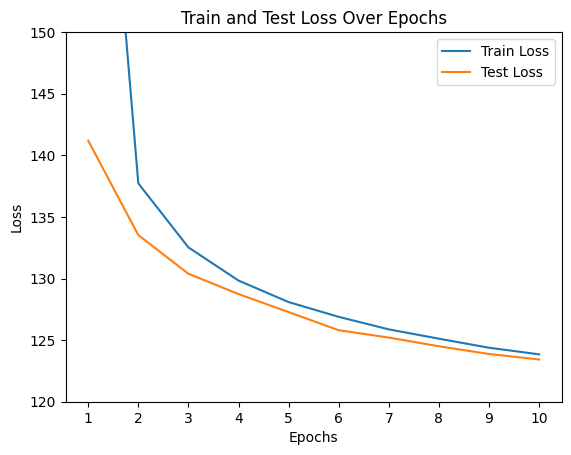

1's avrage train loss : 183.9497089518229
1's avrage test loss : 142.66219013671875
2's avrage train loss : 136.14441751302084
2's avrage test loss : 130.2044890625
3's avrage train loss : 127.96884205729167
3's avrage test loss : 124.90540390625
4's avrage train loss : 124.12934840494792
4's avrage test loss : 122.322348046875
5's avrage train loss : 121.89411469726562
5's avrage test loss : 120.140025390625
6's avrage train loss : 120.2665759765625
6's avrage test loss : 119.1166185546875
7's avrage train loss : 118.93809375
7's avrage test loss : 117.8841955078125
8's avrage train loss : 117.75172509765625
8's avrage test loss : 116.72429560546875
9's avrage train loss : 116.6740569498698
9's avrage test loss : 115.55956416015626
10's avrage train loss : 115.764513671875
10's avrage test loss : 114.77603525390624


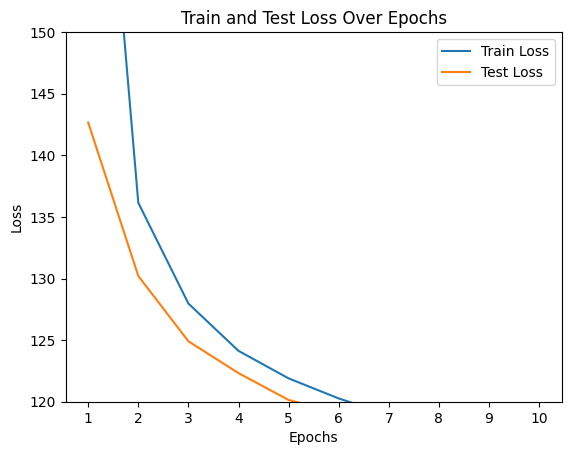

1's avrage train loss : 186.9730204264323
1's avrage test loss : 148.1813525390625
2's avrage train loss : 140.18381022135418
2's avrage test loss : 132.71131181640624
3's avrage train loss : 129.55476923828124
3's avrage test loss : 125.0514384765625
4's avrage train loss : 124.09895255533854
4's avrage test loss : 121.228082421875
5's avrage train loss : 121.00607477213542
5's avrage test loss : 118.80080986328124
6's avrage train loss : 118.8593349609375
6's avrage test loss : 117.04907138671875
7's avrage train loss : 117.19520162760416
7's avrage test loss : 115.9359203125
8's avrage train loss : 115.94955797526042
8's avrage test loss : 114.48647412109375
9's avrage train loss : 114.93236236979166
9's avrage test loss : 113.7569548828125
10's avrage train loss : 114.13114241536458
10's avrage test loss : 113.183940625


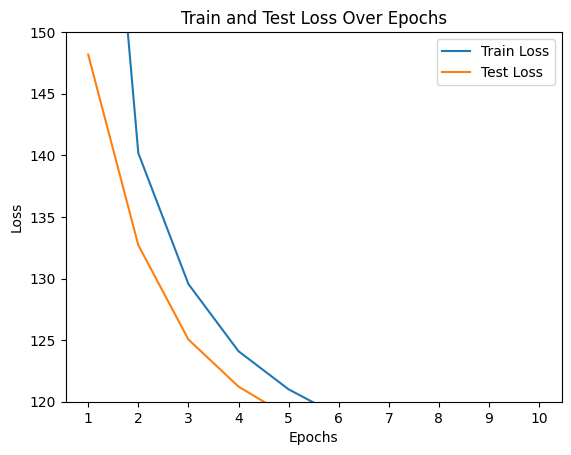

1's avrage train loss : 215.77693597005208
1's avrage test loss : 165.3215681640625
2's avrage train loss : 158.0296573079427
2's avrage test loss : 150.6583671875
3's avrage train loss : 145.52487936197917
3's avrage test loss : 139.55347490234374
4's avrage train loss : 137.3458300455729
4's avrage test loss : 133.43911787109374
5's avrage train loss : 132.04221879882812
5's avrage test loss : 128.914623828125
6's avrage train loss : 128.17260841471355
6's avrage test loss : 125.92809599609375
7's avrage train loss : 125.66597906901042
7's avrage test loss : 123.8098314453125
8's avrage train loss : 123.54323544921876
8's avrage test loss : 122.066551953125
9's avrage train loss : 121.78004734700521
9's avrage test loss : 120.23506904296875
10's avrage train loss : 120.23679474283854
10's avrage test loss : 118.88220673828125


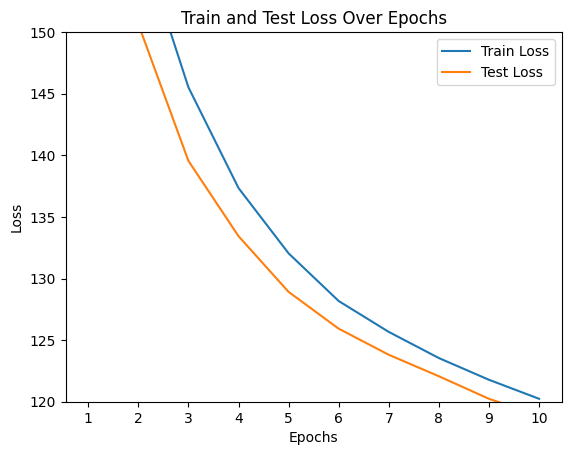

In [11]:
z_list = [3, 5, 10, 20 ,200]
for z in z_list:
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
    model = VAE(x_dim = 28 ** 2, h_dim1 = 500, h_dim2 = 250, z_dim = z).to(device)
    optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.02)
    train_loss_list = []
    test_loss_list = []
    for epoch in range(1, 11):
        train(epoch)
        test(epoch)

    epochs = range(1, 11)  
    plt.plot(epochs, train_loss_list, label='Train Loss')
    plt.plot(epochs, test_loss_list, label='Test Loss')
    plt.ylim(120, 150)
    plt.xticks(range(1, 11))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train and Test Loss Over Epochs')
    plt.show()

    with torch.no_grad():
        z_random = torch.randn(64, z).to(device)
        sample = model.decoder(z_random).to(device)
        
        save_image(sample.view(64, 1, 28, 28), './samples' + '{}.png'.format(z))

1's avrage train loss : 176.7695611328125
1's avrage test loss : 156.68151689453126
2's avrage train loss : 153.1355603515625
2's avrage test loss : 149.8614412109375
3's avrage train loss : 148.19169075520833
3's avrage test loss : 146.5399798828125
4's avrage train loss : 145.60141865234374
4's avrage test loss : 144.728263671875
5's avrage train loss : 143.98771595052082
5's avrage test loss : 143.445462890625
6's avrage train loss : 142.80980629882814
6's avrage test loss : 142.2957435546875
7's avrage train loss : 141.83754601236978
7's avrage test loss : 141.66707802734376
8's avrage train loss : 141.0564501139323
8's avrage test loss : 140.9464673828125
9's avrage train loss : 140.42253160807292
9's avrage test loss : 140.49858671875
10's avrage train loss : 139.85002169596353
10's avrage test loss : 139.890524609375
11's avrage train loss : 139.3397340657552
11's avrage test loss : 139.56559287109374
12's avrage train loss : 138.9091097330729
12's avrage test loss : 139.1417233

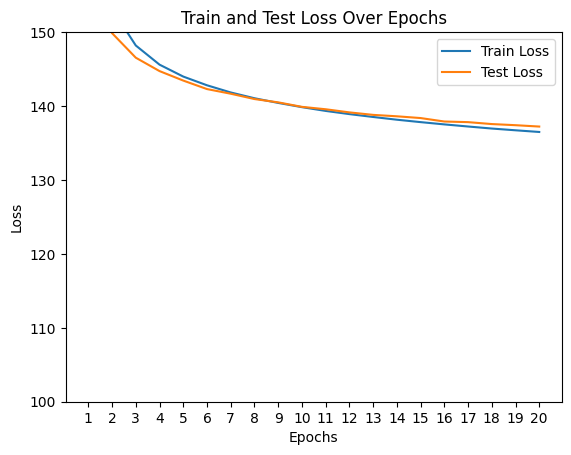

1's avrage train loss : 156.85737776692707
1's avrage test loss : 138.16305615234376
2's avrage train loss : 135.49411998697917
2's avrage test loss : 132.66128994140624
3's avrage train loss : 131.43297683919272
3's avrage test loss : 129.6693240234375
4's avrage train loss : 129.17116206054686
4's avrage test loss : 128.01461142578125
5's avrage train loss : 127.69964461263021
5's avrage test loss : 126.7144521484375
6's avrage train loss : 126.57544778645833
6's avrage test loss : 125.87805146484375
7's avrage train loss : 125.71751791992187
7's avrage test loss : 125.0447802734375
8's avrage train loss : 124.98346362304687
8's avrage test loss : 124.38413095703125
9's avrage train loss : 124.40710670572916
9's avrage test loss : 123.94072783203126
10's avrage train loss : 123.8710979654948
10's avrage test loss : 123.527994140625
11's avrage train loss : 123.42872749023438
11's avrage test loss : 123.0192345703125
12's avrage train loss : 123.01032835286459
12's avrage test loss : 

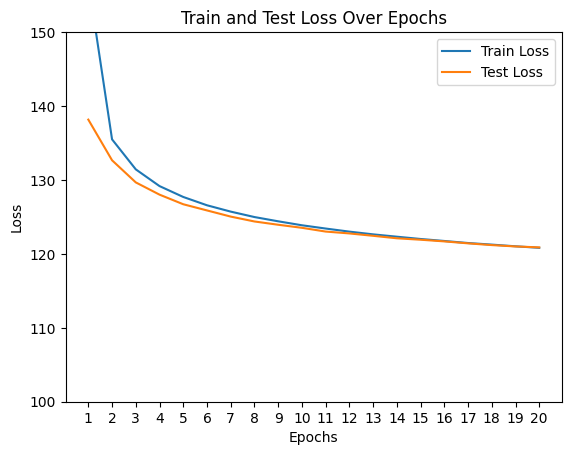

1's avrage train loss : 170.16986796875
1's avrage test loss : 144.6880529296875
2's avrage train loss : 136.8432819498698
2's avrage test loss : 129.8063484375
3's avrage train loss : 127.60975027669271
3's avrage test loss : 124.2370283203125
4's avrage train loss : 123.68844109700521
4's avrage test loss : 121.210367578125
5's avrage train loss : 121.33481726888022
5's avrage test loss : 119.25993974609375
6's avrage train loss : 119.51041512044272
6's avrage test loss : 117.70385859375
7's avrage train loss : 117.71776897786458
7's avrage test loss : 116.00254111328125
8's avrage train loss : 116.35347692057292
8's avrage test loss : 114.87430341796875
9's avrage train loss : 115.29885211588541
9's avrage test loss : 113.9156767578125
10's avrage train loss : 114.43846381835938
10's avrage test loss : 113.181344921875
11's avrage train loss : 113.72826635742187
11's avrage test loss : 112.5212935546875
12's avrage train loss : 113.07335014648437
12's avrage test loss : 111.93673740

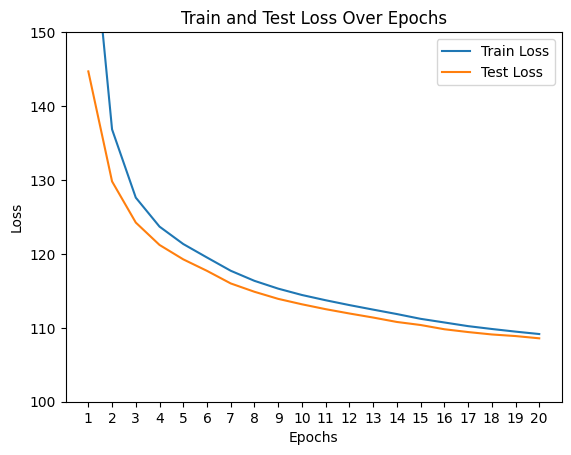

1's avrage train loss : 171.721755078125
1's avrage test loss : 143.1698509765625
2's avrage train loss : 137.31100275065103
2's avrage test loss : 130.55494921875
3's avrage train loss : 128.559814453125
3's avrage test loss : 125.189583984375
4's avrage train loss : 124.65948764648438
4's avrage test loss : 122.2759630859375
5's avrage train loss : 122.24403455403646
5's avrage test loss : 120.40700302734375
6's avrage train loss : 120.54098025716146
6's avrage test loss : 118.90126474609374
7's avrage train loss : 119.11651596679687
7's avrage test loss : 117.52931826171876
8's avrage train loss : 117.59307644856771
8's avrage test loss : 115.86245830078126
9's avrage train loss : 116.10640623372396
9's avrage test loss : 114.612898828125
10's avrage train loss : 114.87321124674479
10's avrage test loss : 113.70099150390625
11's avrage train loss : 113.94152086588542
11's avrage test loss : 112.91195517578124
12's avrage train loss : 113.14796474609375
12's avrage test loss : 112.04

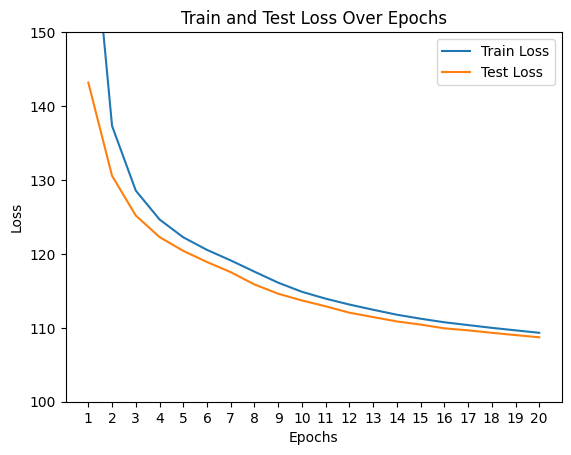

1's avrage train loss : 182.51336829427083
1's avrage test loss : 162.8666439453125
2's avrage train loss : 155.84135979817708
2's avrage test loss : 149.85705849609374
3's avrage train loss : 146.86156051432292
3's avrage test loss : 142.210281640625
4's avrage train loss : 140.2675962076823
4's avrage test loss : 136.3912763671875
5's avrage train loss : 134.90590068359376
5's avrage test loss : 131.6947625
6's avrage train loss : 130.17000161132813
6's avrage test loss : 127.18282109375
7's avrage train loss : 126.19210148111979
7's avrage test loss : 123.5403677734375
8's avrage train loss : 123.0442776529948
8's avrage test loss : 120.789458984375
9's avrage train loss : 120.66869710286458
9's avrage test loss : 118.73517412109375
10's avrage train loss : 118.70239850260417
10's avrage test loss : 116.87347216796876
11's avrage train loss : 117.04843932291666
11's avrage test loss : 115.53547666015625
12's avrage train loss : 115.74246612955729
12's avrage test loss : 114.55209931

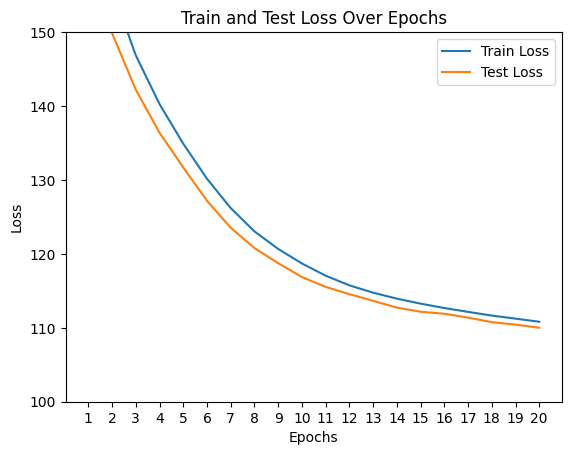

In [23]:
z_list = [3, 5, 10, 20 ,200]
for z in z_list:
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
    model = VAE(x_dim = 28 ** 2, h_dim1 = 500, h_dim2 = 250, z_dim = z).to(device)
    optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.01)
    train_loss_list = []
    test_loss_list = []
    for epoch in range(1, 21):
        train(epoch)
        test(epoch)

    epochs = range(1, 21)  
    plt.plot(epochs, train_loss_list, label='Train Loss')
    plt.plot(epochs, test_loss_list, label='Test Loss')
    plt.ylim(100, 150)
    plt.xticks(range(1, 21))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train and Test Loss Over Epochs')
    plt.show()

    # with torch.no_grad():
    #     z_random = torch.randn(64, z).to(device)
    #     sample = model.decoder(z_random).to(device)
        
    #     save_image(sample.view(64, 1, 28, 28), './samples' + '{}.png'.format(z))

In [24]:
z_list = [2, 5, 10, 20]
for z in z_list:
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
    model = VAE(x_dim = 28 ** 2, h_dim1 = 500, h_dim2 = 250, z_dim = z).to(device)
    optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.01)
    train_loss_list = []
    test_loss_list = []
    for epoch in range(1, 21):
        train(epoch)
        test(epoch)
        
    with torch.no_grad():
        z_random = torch.randn(64, z).to(device)
        sample = model.decoder(z_random).to(device)
        
        save_image(sample.view(64, 1, 28, 28), './samples' + '{}.png'.format(z))

1's avrage train loss : 178.760674609375
1's avrage test loss : 166.43130048828124
2's avrage train loss : 164.19122633463542
2's avrage test loss : 162.300903515625
3's avrage train loss : 160.93645309244792
3's avrage test loss : 159.59343974609374
4's avrage train loss : 158.4673716796875
4's avrage test loss : 157.52556728515626
5's avrage train loss : 156.68274055989582
5's avrage test loss : 156.02777568359375
6's avrage train loss : 155.42567737630208
6's avrage test loss : 155.22138193359376
7's avrage train loss : 154.44766772460937
7's avrage test loss : 154.4418962890625
8's avrage train loss : 153.67254534505207
8's avrage test loss : 153.65575439453124
9's avrage train loss : 153.02664375
9's avrage test loss : 153.3150490234375
10's avrage train loss : 152.4696499674479
10's avrage test loss : 152.74104912109374
11's avrage train loss : 151.97836251627604
11's avrage test loss : 152.3250654296875
12's avrage train loss : 151.55291863606772
12's avrage test loss : 152.0213

1's avrage train loss : 184.42575338541667
1's avrage test loss : 152.4404474609375
2's avrage train loss : 148.95369108072916
2's avrage test loss : 145.770215234375
3's avrage train loss : 144.40929521484375
3's avrage test loss : 142.74898505859375
4's avrage train loss : 141.97209427083334
4's avrage test loss : 141.2836857421875
5's avrage train loss : 140.398101171875
5's avrage test loss : 140.09914296875
6's avrage train loss : 139.18918331705729
6's avrage test loss : 138.97637060546876
7's avrage train loss : 138.23819845377605
7's avrage test loss : 138.323884765625
8's avrage train loss : 137.46091004231772
8's avrage test loss : 137.8087994140625
9's avrage train loss : 136.81306499023438
9's avrage test loss : 137.0020494140625
10's avrage train loss : 136.26913046875
10's avrage test loss : 136.63080537109374


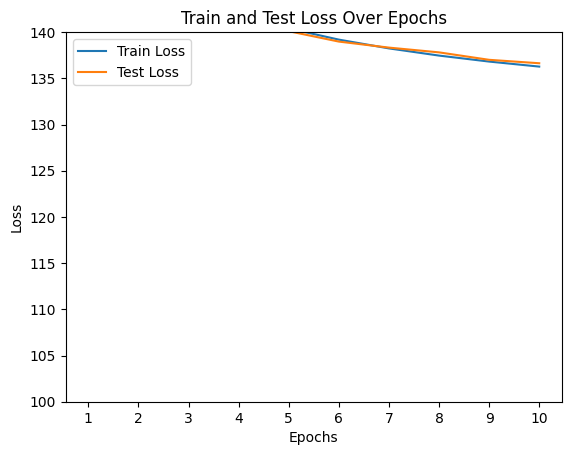

1's avrage train loss : 171.57732130533853
1's avrage test loss : 137.90522001953124
2's avrage train loss : 134.98606490885416
2's avrage test loss : 131.65444619140624
3's avrage train loss : 130.66884529622396
3's avrage test loss : 129.03485302734376
4's avrage train loss : 128.28879973958334
4's avrage test loss : 127.00754365234376
5's avrage train loss : 126.71313639322916
5's avrage test loss : 125.8422671875
6's avrage train loss : 125.56602820638021
6's avrage test loss : 125.191110546875
7's avrage train loss : 124.68945625
7's avrage test loss : 124.2976369140625
8's avrage train loss : 124.02621254882813
8's avrage test loss : 123.8571658203125
9's avrage train loss : 123.4302962890625
9's avrage test loss : 123.23087041015626
10's avrage train loss : 122.91290027669271
10's avrage test loss : 122.8184009765625


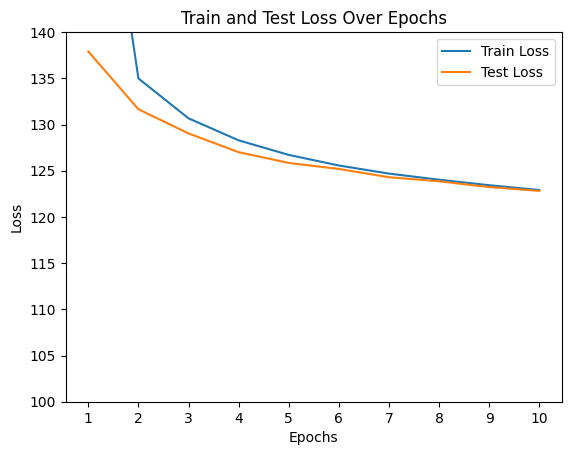

1's avrage train loss : 187.17679567057291
1's avrage test loss : 142.56800927734375
2's avrage train loss : 135.9682167643229
2's avrage test loss : 130.58620048828126
3's avrage train loss : 128.6401689778646
3's avrage test loss : 124.8890380859375
4's avrage train loss : 124.57985126953125
4's avrage test loss : 122.2044912109375
5's avrage train loss : 122.21250288085938
5's avrage test loss : 120.63052734375
6's avrage train loss : 120.31057701822917
6's avrage test loss : 118.53111240234375
7's avrage train loss : 118.37513852539062
7's avrage test loss : 116.9555201171875
8's avrage train loss : 116.84997815755209
8's avrage test loss : 115.50226220703125
9's avrage train loss : 115.68152395833333
9's avrage test loss : 114.57266923828125
10's avrage train loss : 114.77693025716145
10's avrage test loss : 113.6825494140625


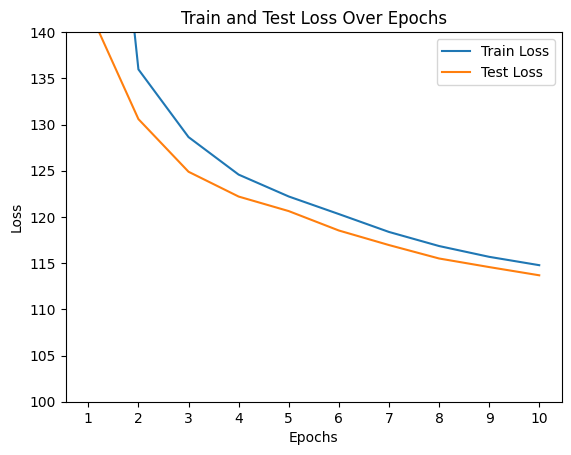

1's avrage train loss : 420.07545727539065
1's avrage test loss : 156.67571640625
2's avrage train loss : 145.44290463867188
2's avrage test loss : 137.2360142578125
3's avrage train loss : 135.76002936197918
3's avrage test loss : 132.46310048828124
4's avrage train loss : 131.87660455729167
4's avrage test loss : 129.31930615234376
5's avrage train loss : 128.55868224283853
5's avrage test loss : 126.34941513671875
6's avrage train loss : 125.91404541015625
6's avrage test loss : 123.78515458984376
7's avrage train loss : 124.02011051432292
7's avrage test loss : 122.43345322265625
8's avrage train loss : 122.52762623697917
8's avrage test loss : 120.98047861328125
9's avrage train loss : 121.22985198567709
9's avrage test loss : 119.9065041015625
10's avrage train loss : 120.15493774414062
10's avrage test loss : 118.86361552734375


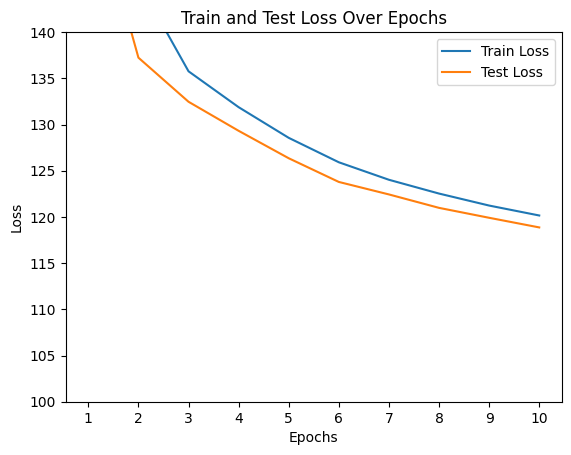

1's avrage train loss : 568.8700938964844
1's avrage test loss : 171.55694228515625
2's avrage train loss : 162.87997700195314
2's avrage test loss : 154.82433017578126
3's avrage train loss : 151.21361502278646
3's avrage test loss : 147.019541796875
4's avrage train loss : 144.59632649739584
4's avrage test loss : 140.07636943359375
5's avrage train loss : 137.70505795898438
5's avrage test loss : 134.144024609375
6's avrage train loss : 132.7374935546875
6's avrage test loss : 130.18355234375
7's avrage train loss : 129.72012579752604
7's avrage test loss : 127.7556478515625
8's avrage train loss : 127.61342924804687
8's avrage test loss : 125.9252779296875
9's avrage train loss : 125.8212379720052
9's avrage test loss : 124.56255
10's avrage train loss : 124.26577916666666
10's avrage test loss : 122.87450068359375


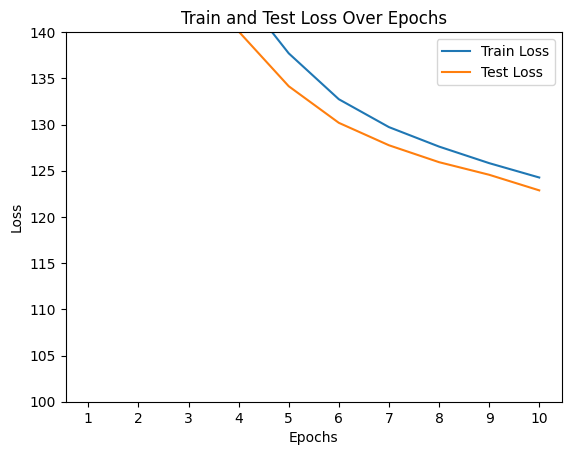

In [17]:
z_list = [3, 5, 10, 20 ,200]
for z in z_list:
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)
    model = VAE(x_dim = 28 ** 2, h_dim1 = 500, h_dim2 = 250, z_dim = z).to(device)
    optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.02)
    train_loss_list = []
    test_loss_list = []
    for epoch in range(1, 11):
        train(epoch)
        test(epoch)

    epochs = range(1, 11)  
    plt.plot(epochs, train_loss_list, label='Train Loss')
    plt.plot(epochs, test_loss_list, label='Test Loss')
    plt.ylim(100, 140)
    plt.xticks(range(1, 11))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train and Test Loss Over Epochs')
    plt.show()

    with torch.no_grad():
        z_random = torch.randn(64, z).to(device)
        sample = model.decoder(z_random).to(device)
        
        save_image(sample.view(64, 1, 28, 28), './samples' + '{}.png'.format(z))